# Computer Vision

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

More info about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, we explore the dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that will be used to obtain the data.

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
print(dataDir)
dataType = 'val2014'
#instances_annFile = os.path.join(dataDir, 'annotations\\instances_{}.json'.format(dataType))
instances_annFile = "C:/Users/rushi/Desktop/Coding/UdacityCourses/Computer_Vision/Image-Captioning-Project/CVND---Image-Captioning-Project-master/opt/cocoapi/annotations/instances_val2014.json"
instances_annFile = os.path.normpath(instances_annFile)
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
#captions_annFile =  os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
captions_annFile = "C:/Users/rushi/Desktop/Coding/UdacityCourses/Computer_Vision/Image-Captioning-Project/CVND---Image-Captioning-Project-master/opt/cocoapi/annotations/captions_val2014.json"
captions_annFile = os.path.normpath(captions_annFile)
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

/opt/cocoapi
loading annotations into memory...
Done (t=12.77s)
creating index...
index created!
loading annotations into memory...
Done (t=0.79s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.

In the project, we will use this dataset to train our model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000077681.jpg


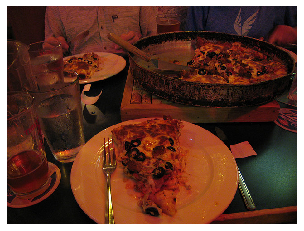

A slice of pizza that is on a plate.
The people sit at the table near a half eaten pizza. 
A table with a deep dish pizza in a pan and a dish with one slice and fork on it.
A pizza sitting on a table that has plates and glasses on it.
A deep dish pizza on restaurant plates topped with olives. 


In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, we will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.

![Image Captioning CNN-RNN model](images/encoder-decoder.png)